# 5.8~ 5.9

## 1) 문제 정의 

최근접 쌍의 거리 문제를 억지기법이 아닌 분할 정복 기법으로 만든 알고리즘으로 사용

## 2) 알고리즘 설명

억지 기법에선 일일이 모든 두 점 사이의 거리를 찾고 찾은 거리가 가장 작은 값을 리턴했었지만,
분할 정복 기법에서는 한 면을 두 면으로 분할하여 왼쪽 면에서의 두 점 사이의 거리 값이 최소 값을 찾고 오른 쪽 면에서도 두 점 사이의 거리 값을 찾으며
둘 중에 더 작은 값을 d로 놓아 d거리보다 작은 점들을 두 면 경계선에서 찾는 방법을 사용하고 있다.

## 3) 손으로 푼 예제

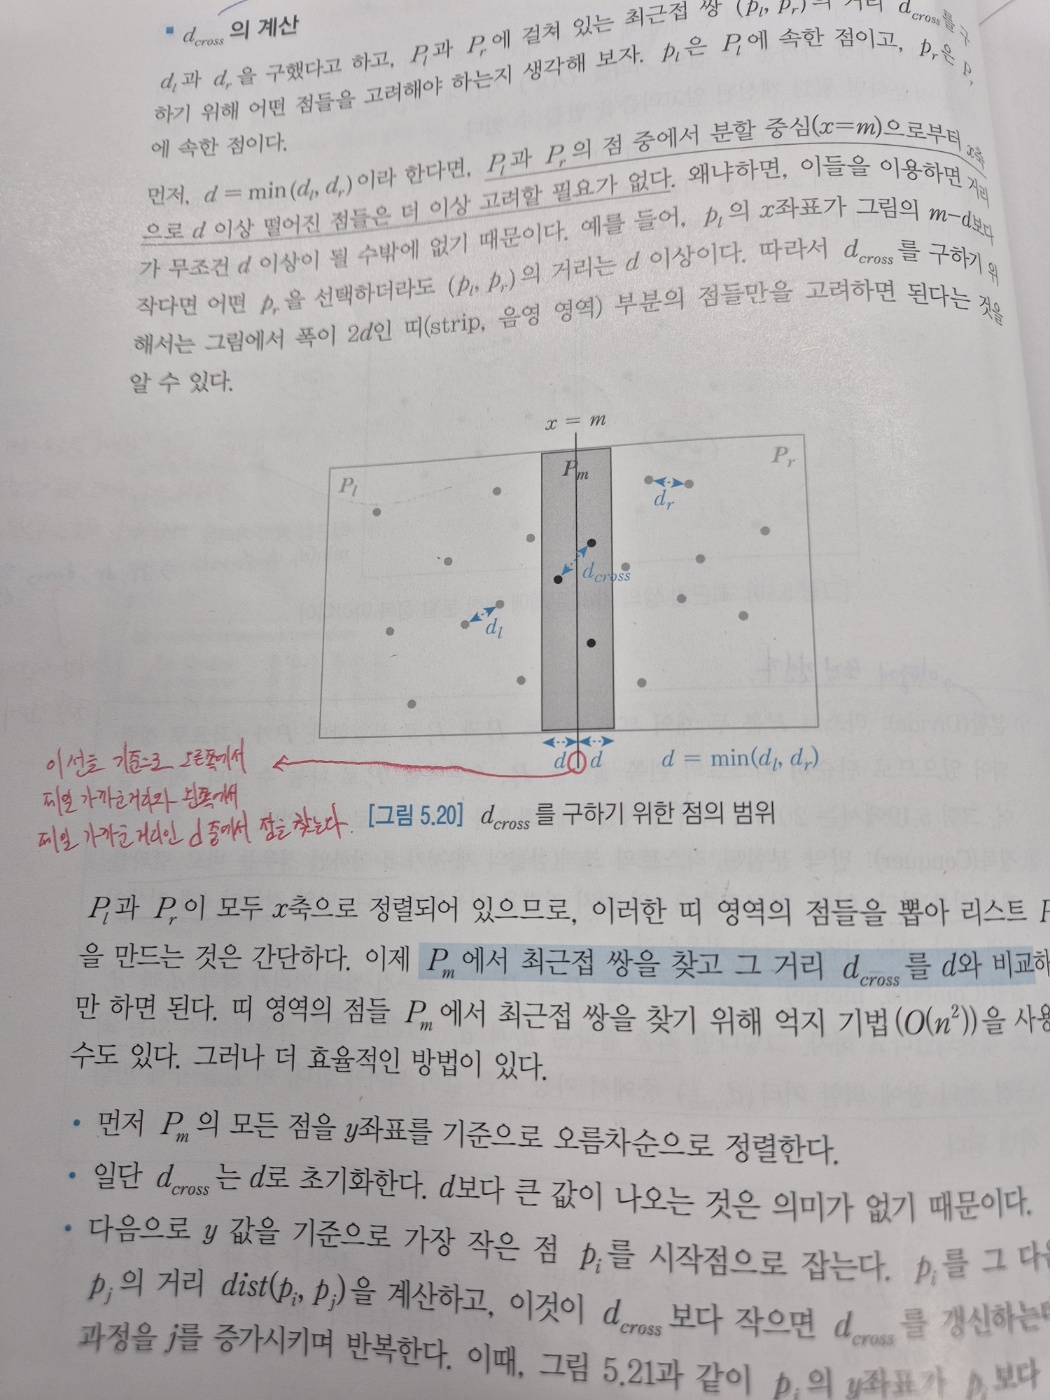

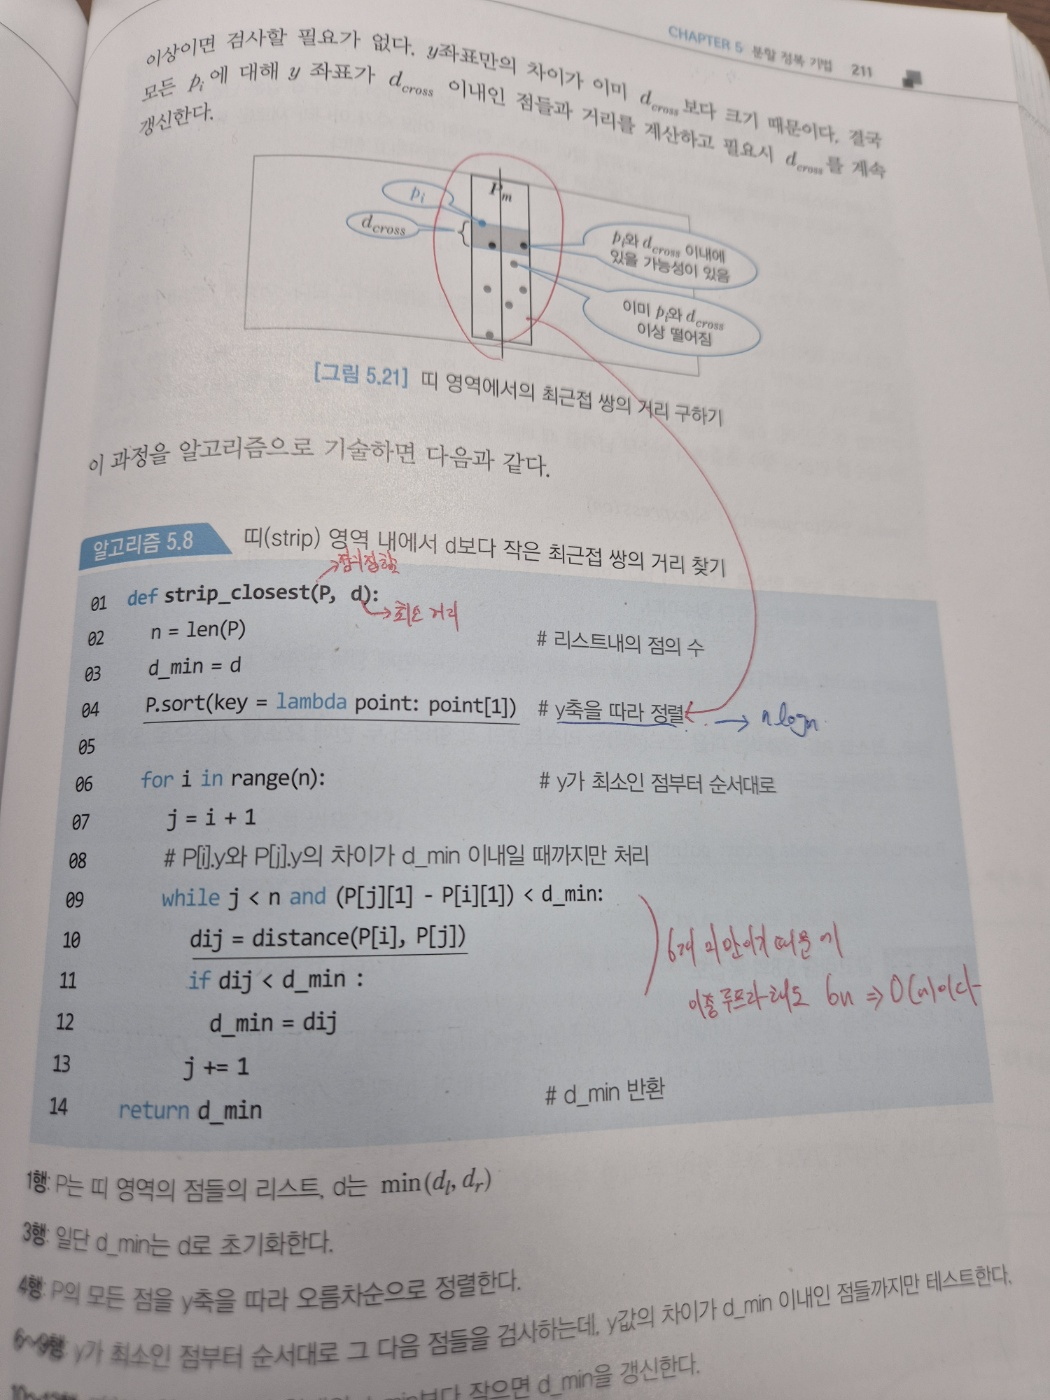

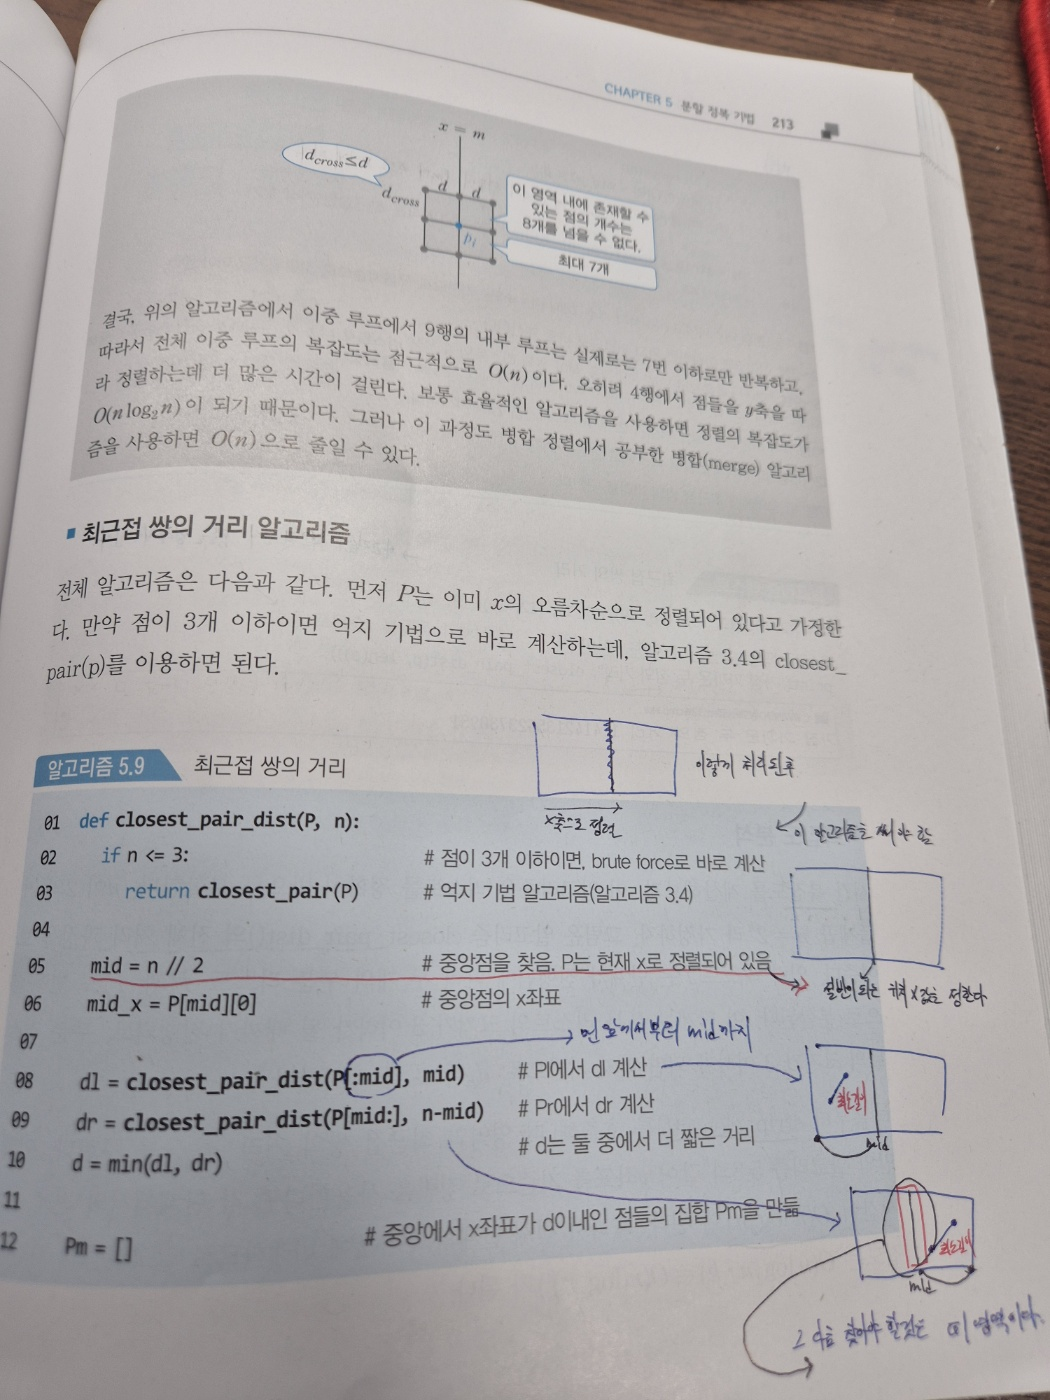

## 4) 알고리즘 개요

한 면을 두 면으로 분할하여 왼쪽 면에서의 두 점 사이의 거리 값이 최소 값을 찾고 오른 쪽 면에서도 두 점 사이의 거리 값을 찾으며 
둘 중에 더 작은 값을 d로 놓아 d거리보다 작은 점들을 두 면 경계선에서 찾는 방법을 사용하고 있다.
분할 정복 기법을 사용하여 억지 기법보다 빠른 시간 복잡도를 갖고 있다.
억지 기법의 시간 복잡도는 O(N^2)이지만 분할 정복 기법을 사용한 알고리즘의 시간 복잡도는 O(NlogN)이 된다

## 5) 알고리즘 코드

In [ ]:
def strip_closest(P,d):
    n = len(P)
    d_min = d
    P.sort(key = lambda point : point[1])

    for i in range(n):
        j = i + 1
        while j < n and (P[j][1] - P[i][1]) < d_min:
            dij=distance(P[i],P[j])
            if dij < d_min:
                d_min=dij
            j += 1
    return d_min


    
def closest_pair_dist(P,n):
    if n <= 3:
        return closest_pair(P)
    
    mid = n // 2
    mid_x = P[mid][0]

    dl = closest_pair_dist(P[:mid], mid)
    dr = closest_pair_dist(P[mid:], n-mid)
    d = min(dl,dr)

    Pm = []

    for i in range(n):
        if abs(P[i][0]-mid_x)<d:
            Pm.append(P[i])

    ds = strip_closest(Pm,d)
    return ds

closet_pair_dist의 함수는 입력값을 점들의 집합과 점의 개수를 입력 받아 한 면을 분할하는 역할을 한다-> 최종적으론 정렬되어 있는 x축 점들의 왼쪽 면의 최솟값과 오른쪽 면의 최솟값을 비교한다.
strip_closest의 함수는 입력값을 점들의 집합과 최소거리를 입력을 받으며 위의 함수의 뒷받침을 하는 역할을 한다.
->최종적으로 왼쪽 면의 최솟값과 오른쪽 면의 최솟값을 비교한 값을 임의의 거리로 설정하고 y축으로 정렬되어 있는 점들을 임의의 거리로 비교하며 최솟값을 찾는다

## 6) 테스트 코드

In [4]:
import math
def distance(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)

def closest_pair(p):
    n=len(p)
    mindist=float("inf")
    for i in range(n-1):
        for j in range(i+1,n):
            dist = distance(p[i],p[j])
            if dist < mindist:
                mindist = dist
    return mindist



def strip_closest(P,d):
    n = len(P)
    d_min = d
    P.sort(key = lambda point : point[1])

    for i in range(n):
        j = i + 1
        while j < n and (P[j][1] - P[i][1]) < d_min:
            dij=distance(P[i],P[j])
            if dij < d_min:
                d_min=dij
            j += 1
    return d_min


    
def closest_pair_dist(P,n):
    if n <= 3:
        return closest_pair(P)
    
    mid = n // 2
    mid_x = P[mid][0]

    dl = closest_pair_dist(P[:mid], mid)
    dr = closest_pair_dist(P[mid:], n-mid)
    d = min(dl,dr)

    Pm = []

    for i in range(n):
        if abs(P[i][0]-mid_x)<d:
            Pm.append(P[i])

    ds = strip_closest(Pm,d)
    return ds

p=[(2,3),(12,30),(40,50),(5,1),(12,10),(3,4)]
p.sort(key = lambda point: point[0])
print("가장 가까운 두 점의 거리",closest_pair_dist(p,len(p)))

가장 가까운 두 점의 거리 1.4142135623730951


## 7) 수행 결과

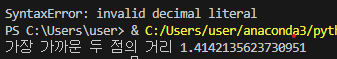

## 8) 복잡도 분석

strip_closest()를 호출하는 것은 o(nlogn)이 되며 
전체 단계의 수가 k에 비례하므로 알고리즘의 시간복잡도는 o((nlogn)^2)가 되지만
만약 strip_closest()를 호출하지 않고 미리 정렬을 하고 알고리즘을 돌리면 o(nlogn)이 된다